In [2]:
import numpy as np
import scanpy as sc

In [3]:
adata = sc.read_h5ad("/home/mila/a/alexander.tong/scratch/time_series/ebdata.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 18203 × 17789
    obs: 'sample_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_name', 'gene_id', 'gene_name_id'
    uns: 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'sample_labels_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_phate', 'X_tsne', 'X_umap'
    obsp: 'connectivities', 'distances'

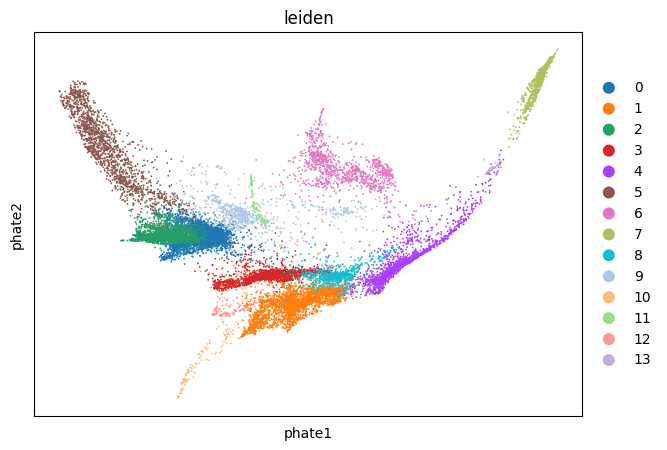

In [6]:
sc.pl.scatter(adata, basis="phate", color="leiden")

In [9]:
adata.uns["iroot"] = np.flatnonzero(adata.obs["leiden"] == "7")[0]

In [10]:
sc.tl.dpt(adata)

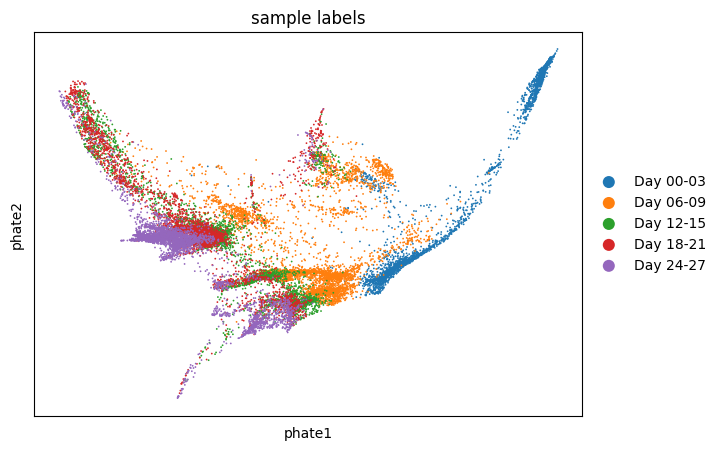

In [32]:
sc.pl.scatter(adata, basis="phate", color="sample_labels")

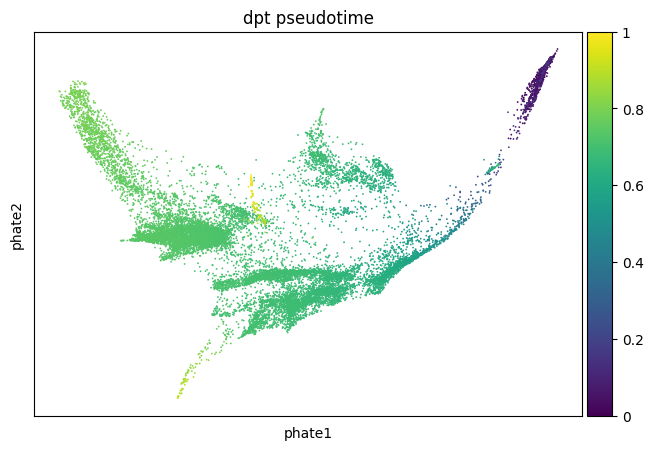

In [12]:
sc.pl.scatter(adata, basis="phate", color="dpt_pseudotime")

In [13]:
# 1d PHATE
import phate

phate_op = phate.PHATE(n_components=1, random_state=42)
oned_embed = phate_op.fit_transform(adata.X)

Calculating PHATE...
  Running PHATE on 18203 observations and 17789 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 30.00 seconds.
    Calculating KNN search...
    Calculated KNN search in 56.41 seconds.
    Calculating affinities...
    Calculated affinities in 4.66 seconds.
  Calculated graph and diffusion operator in 91.10 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.85 seconds.
    Calculating KMeans...
    Calculated KMeans in 8.98 seconds.
  Calculated landmark operator in 11.82 seconds.
  Calculating optimal t...
    Automatically selected t = 19
  Calculated optimal t in 3.70 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.17 seconds.
  Calculating metric MDS...


/home/mila/a/alexander.tong/.conda/envs/trajectory-inference/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 4.42 seconds.
Calculated PHATE in 113.23 seconds.


In [14]:
adata.obs["1d-phate"] = oned_embed

In [19]:
adata.obsm["X_phate_time"] = np.stack([adata.obs["dpt_pseudotime"], adata.obs["1d-phate"]], axis=1)

In [27]:
adata.obsm["X_phate_real_time"] = np.stack(
    [
        adata.obs["sample_labels"].cat.codes + np.random.randn(adata.shape[0]) * 0.2,
        adata.obs["1d-phate"],
    ],
    axis=1,
)

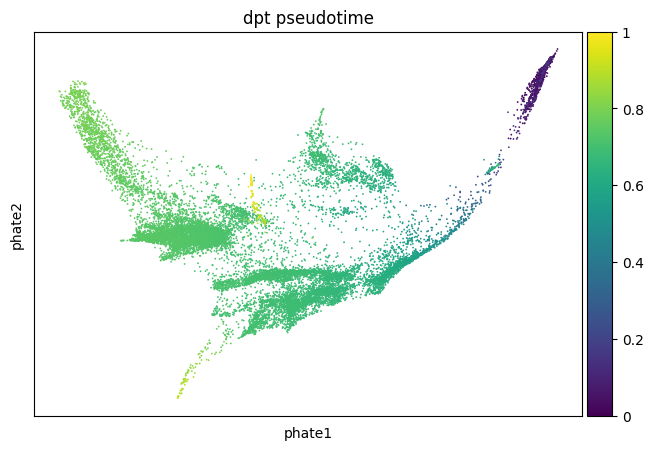

In [20]:
sc.pl.scatter(adata, basis="phate", color="dpt_pseudotime")

In [1]:
sc.pl.scatter(adata, basis="phate", color="leiden")

NameError: name 'sc' is not defined

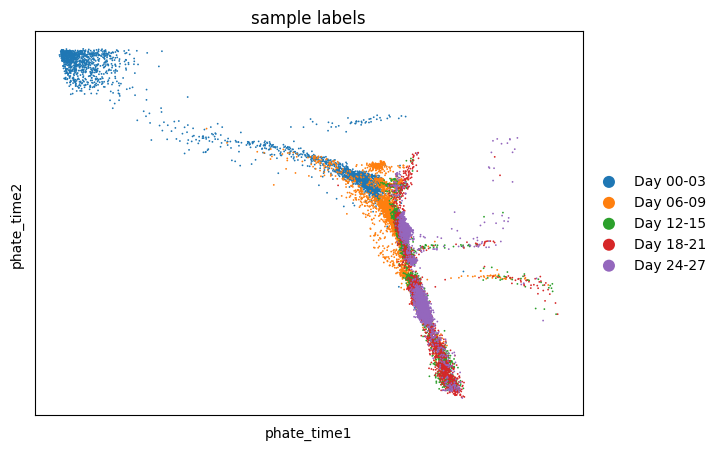

In [22]:
sc.pl.scatter(adata, basis="phate_time", color="sample_labels")

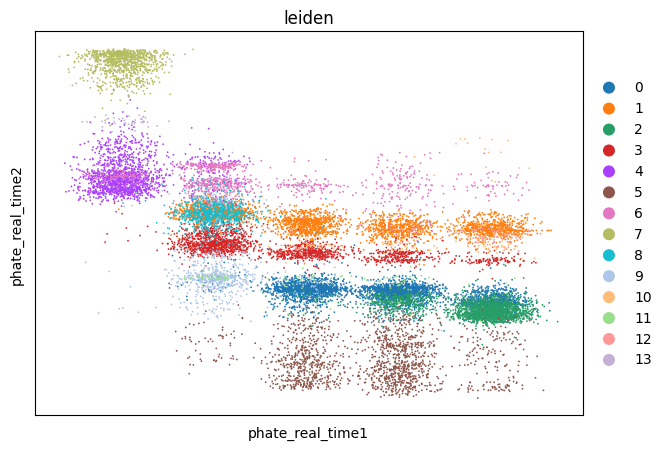

In [30]:
sc.pl.scatter(adata, basis="phate_real_time", color="leiden")

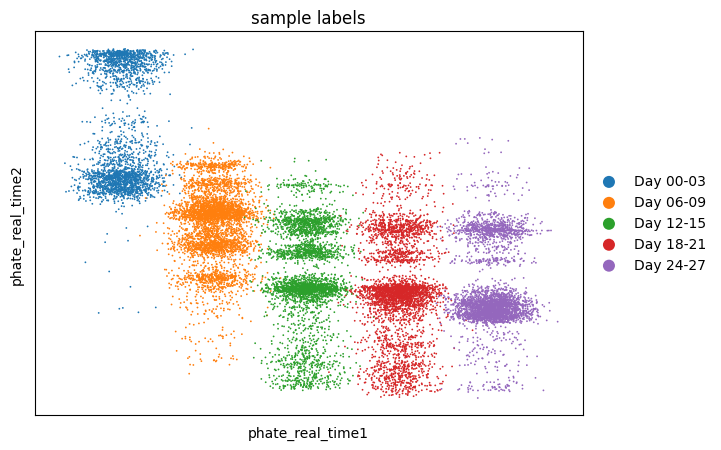

In [75]:
sc.pl.scatter(adata, basis="phate_real_time", color="sample_labels")

In [31]:
adata.write_h5ad(
    "/home/mila/a/alexander.tong/scratch/time_series/ebdata_v2.h5ad", compression="gzip"
)

In [7]:
adata = sc.read_h5ad("/home/mila/a/alexander.tong/scratch/time_series/ebdata_v2.h5ad")

In [8]:
oned = adata.obs["1d-phate"]
oned = (oned - oned.mean()) / oned.std()
oned
adata.obs["1d-phate-normalized"] = oned
adata.obsm["X_phate_normalized"] = np.stack(
    [
        adata.obs["1d-phate-normalized"],
        adata.obs["sample_labels"].cat.codes + np.random.randn(adata.shape[0]) * 0.2,
    ],
    axis=1,
)

In [9]:
adata.write_h5ad(
    "/home/mila/a/alexander.tong/scratch/time_series/ebdata_v3.h5ad", compression="gzip"
)

In [10]:
adata

AnnData object with n_obs × n_vars = 18203 × 17789
    obs: 'sample_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'dpt_pseudotime', '1d-phate', '1d-phate-normalized'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_name', 'gene_id', 'gene_name_id'
    uns: 'diffmap_evals', 'iroot', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'sample_labels_colors', 'tsne', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_phate', 'X_phate_real_time', 'X_phate_time', 'X_tsne', 'X_umap', 'X_phate_normalized'
    obsp: 'connectivities', 'distances'

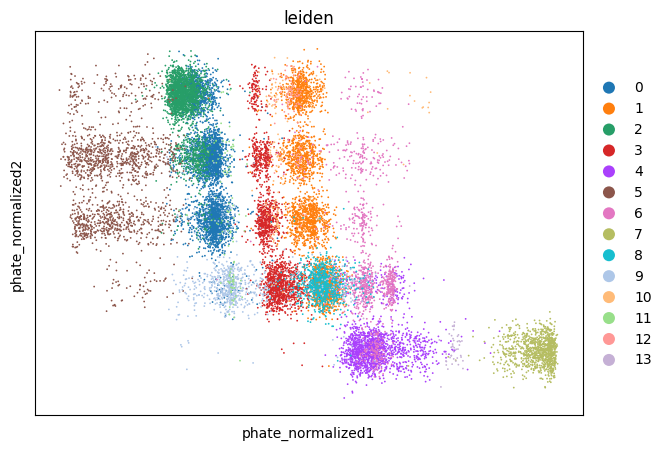

In [12]:
sc.pl.scatter(adata, basis="phate_normalized", color="leiden")

In [15]:
adata_sub = adata[~adata.obs["leiden"].isin(["7"])]

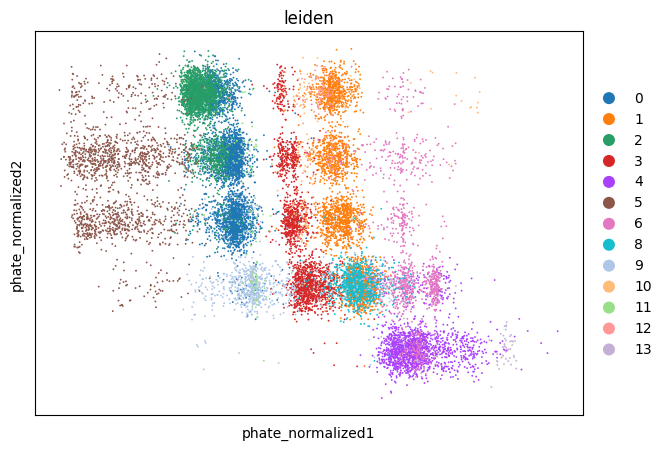

In [16]:
sc.pl.scatter(adata_sub, basis="phate_normalized", color="leiden")

In [28]:
adata_sub

AnnData object with n_obs × n_vars = 17203 × 17789
    obs: 'sample_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'dpt_pseudotime', '1d-phate', '1d-phate-normalized'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_name', 'gene_id', 'gene_name_id'
    uns: 'diffmap_evals', 'iroot', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'sample_labels_colors', 'tsne', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_phate', 'X_phate_real_time', 'X_phate_time', 'X_tsne', 'X_umap', 'X_phate_normalized'
    obsp: 'connectivities', 'distances'

In [31]:
del adata_sub.uns["leiden_colors"]
sc.tl.leiden(adata_sub, resolution=0.25)

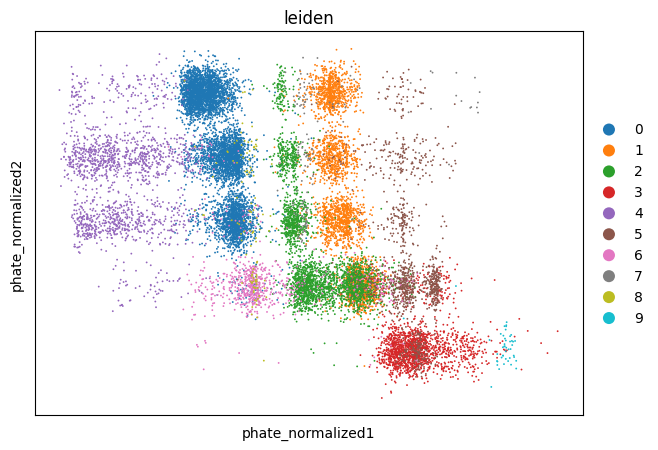

In [32]:
sc.pl.scatter(adata_sub, basis="phate_normalized", color="leiden")

In [34]:
adata_sub.write_h5ad(
    "/home/mila/a/alexander.tong/scratch/time_series/ebdata_no_day_zero_v3.h5ad",
    compression="gzip",
)

In [38]:
adata

AnnData object with n_obs × n_vars = 18203 × 17789
    obs: 'sample_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'dpt_pseudotime', '1d-phate', '1d-phate-normalized'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene_name', 'gene_id', 'gene_name_id'
    uns: 'diffmap_evals', 'iroot', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'sample_labels_colors', 'tsne', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_phate', 'X_phate_real_time', 'X_phate_time', 'X_tsne', 'X_umap', 'X_phate_normalized'
    obsp: 'connectivities', 'distances'

In [40]:
X = adata.obs["1d-phate-normalized"]
t = adata.obs["sample_labels"].cat.codes

In [41]:
X_sub = X[t.isin([3, 4])]
t_sub = t[t.isin([3, 4])]

<AxesSubplot: xlabel='1d-phate-normalized'>

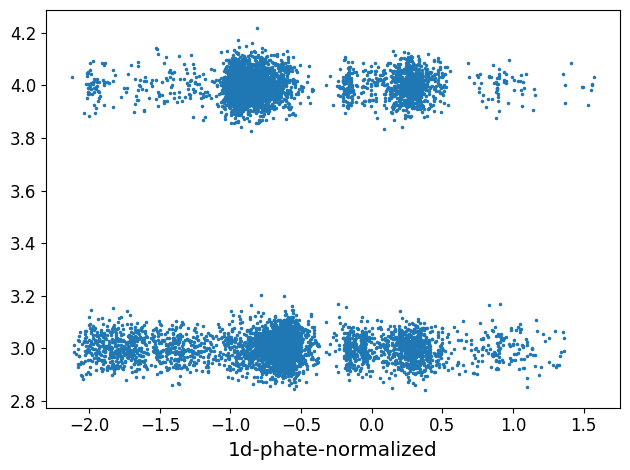

In [50]:
scprep.plot.scatter(X_sub, t_sub + 0.05 * np.random.randn(*t_sub.shape))

<AxesSubplot: xlabel='1d-phate-normalized', ylabel='Density'>

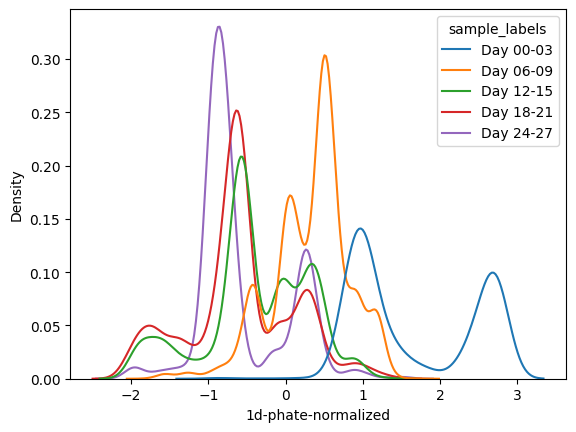

In [57]:
import seaborn as sns

sns.kdeplot(data=adata.obs, x="1d-phate-normalized", hue="sample_labels")

In [73]:
import ot as pot
from scipy.spatial import distance_matrix

x0 = X_sub[t_sub == 3].values[:100, None]
x1 = X_sub[t_sub == 4].values[:100, None]
m = x0.shape[0]
n = x1.shape[0]
a = np.ones(m) / m
b = np.ones(n) / n

M = distance_matrix(x0, x1)

In [82]:
%%time
final_gamma = 1e-8
t, t_list, g_list = pot.regpath.regularization_path(
    a, b, M, reg=final_gamma, semi_relaxed=True, itmax=100
)

maximum iteration has been reached !
CPU times: user 618 ms, sys: 1.16 s, total: 1.78 s
Wall time: 1.83 s


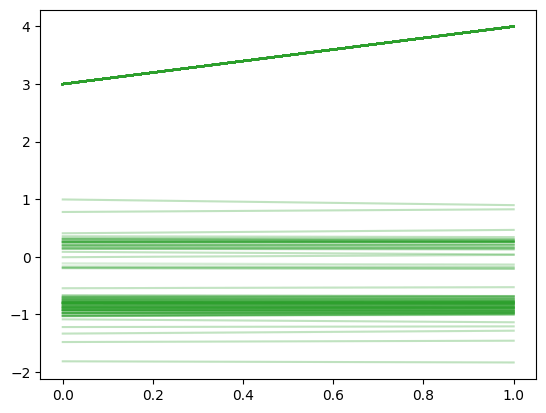

In [101]:
t2 = pot.regpath.compute_transport_plan(1, g_list, t_list).reshape(m, n)
if t2.sum() > 0:
    t2 = t2 / t2.max()
for i in range(m):
    for j in range(n):
        if t2[i, j] > 0:
            plt.plot([[x0[i, 0], 3], [x1[j, 0], 4]], color="C2", alpha=t2[i, j] * 0.3)

In [92]:
t2

array([[0.        , 0.        , 0.00450711, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00270889, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

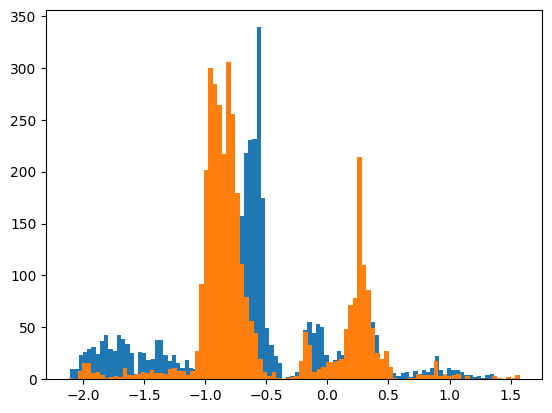

In [55]:
import matplotlib.pyplot as plt

plt.hist(X_sub[t_sub == 3], bins=100)
cax = plt.hist(X_sub[t_sub == 4], bins=100)

<AxesSubplot: >

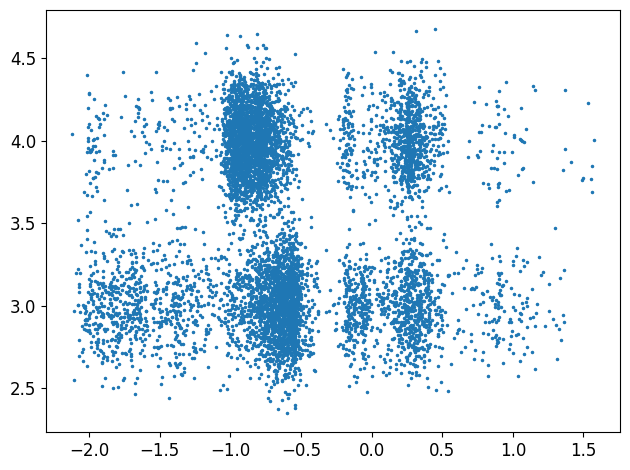

In [37]:
import scprep

scprep.plot.scatter2d(
    adata[adata.obs["sample_labels"].cat.codes.isin([3, 4])].obsm["X_phate_normalized"]
)